In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.impute import SimpleImputer

# Credit Status Dataset

## All features in a list with convenient type of data to use:
### Categorical
* <span style="color:red">ID</span>
* <span style="color:red">Customer_ID</span>
* Month (Can be converted to number or kept like this)
* <span style="color:red">Name</span>
* <span style="color:red">SSN</span>
* Occupation
* Type of Loan
* Credit_mix
* Payment behaviour
* Payment_of_min_amount

### Discrete
* Age
* Num_Bank_Accounts
* Interest Rate
* Num of Loan
* Delay_from_due_date
* Num_of_delayed_payment
* Num_Credit_Card	

### Continous
* Annual_Income
* Monthly_Inhand Salary
* Monthly_Balance
* Credit history age

#### Data Exploration and data cleaning

In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/mau-JS/OracleML/main/credit-status-dataset.csv')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,Good,22 Years and 9 Months,No,Low_spent_Small_value_payments,186.2667021
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,Good,22 Years and 10 Months,No,High_spent_Medium_value_payments,361.4440039
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,Good,NaN,No,Low_spent_Medium_value_payments,264.6754462
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,Good,23 Years and 0 Months,No,High_spent_Medium_value_payments,343.8268732
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,6,1,Credit-Builder Loan,3,1,Good,27 Years and 3 Months,No,High_spent_Large_value_payments,485.2984337


In [30]:
#This will help us notice what columns are numeric or not. This can tell us if we have to convert the data to other format or apply data cleaning.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,42502.0,4182.004291,3174.109304,303.645417,1625.188333,3086.305,5934.189094,15204.63333
Num_Bank_Accounts,50000.0,16.838260,116.396848,-1.000000,3.000000,6.000,7.000000,1798.00000
Num_Credit_Card,50000.0,22.921480,129.314804,0.000000,4.000000,5.000,7.000000,1499.00000
Interest_Rate,50000.0,68.772640,451.602363,1.000000,8.000000,13.000,20.000000,5799.00000
Delay_from_due_date,50000.0,21.052640,14.860397,-5.000000,10.000000,18.000,28.000000,67.00000


Removing unknown symbols from Age and converting to numeric data

In [35]:
# Replacing non-numeric characters with an empty string
df['Age'] = df['Age'].str.replace(r'\D', '', regex=True)
# Convert the 'Age' column to a numeric type
df['Age'] = pd.to_numeric(df['Age'])

In [36]:
#Now age is with the proper format and with non numeric symbols removed.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,50000.0,118.994420,678.133254,14.000000,25.000000,34.000,43.000000,8688.00000
Monthly_Inhand_Salary,42502.0,4182.004291,3174.109304,303.645417,1625.188333,3086.305,5934.189094,15204.63333
Num_Bank_Accounts,50000.0,16.838260,116.396848,-1.000000,3.000000,6.000,7.000000,1798.00000
Num_Credit_Card,50000.0,22.921480,129.314804,0.000000,4.000000,5.000,7.000000,1499.00000
Interest_Rate,50000.0,68.772640,451.602363,1.000000,8.000000,13.000,20.000000,5799.00000
Delay_from_due_date,50000.0,21.052640,14.860397,-5.000000,10.000000,18.000,28.000000,67.00000


In [ ]:
#For consistency and relevance, we convert years and months to continous values. Our years will be kept as discrete values and months as decimals.
def convert_to_years(s):
    years, months = 0, 0
    if isinstance(s, str):
        parts = s.split('and')
        if 'Year' in parts[0]:
            years = int(parts[0].split(' Year')[0])
        if len(parts) > 1 and 'Month' in parts[1]:
            months = int(parts[1].split(' Month')[0])
    return years + months / 12.0

df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_to_years)

In [ ]:
#We remove irrelevant and sensitive data
df = df.drop(['ID','Customer_ID','Name','SSN'],axis=1)
df.head()

Looking for outliers

Visualizing missing data

ID has 0 missing values
Customer_ID has 0 missing values
Month has 0 missing values
Name has 5015 missing values
Age has 0 missing values
SSN has 0 missing values
Occupation has 0 missing values
Annual_Income has 0 missing values
Monthly_Inhand_Salary has 7498 missing values
Num_Bank_Accounts has 0 missing values
Num_Credit_Card has 0 missing values
Interest_Rate has 0 missing values
Num_of_Loan has 0 missing values
Type_of_Loan has 5704 missing values
Delay_from_due_date has 0 missing values
Num_of_Delayed_Payment has 3498 missing values
Credit_Mix has 0 missing values
Credit_History_Age has 4470 missing values
Payment_of_Min_Amount has 0 missing values
Payment_Behaviour has 0 missing values
Monthly_Balance has 562 missing values


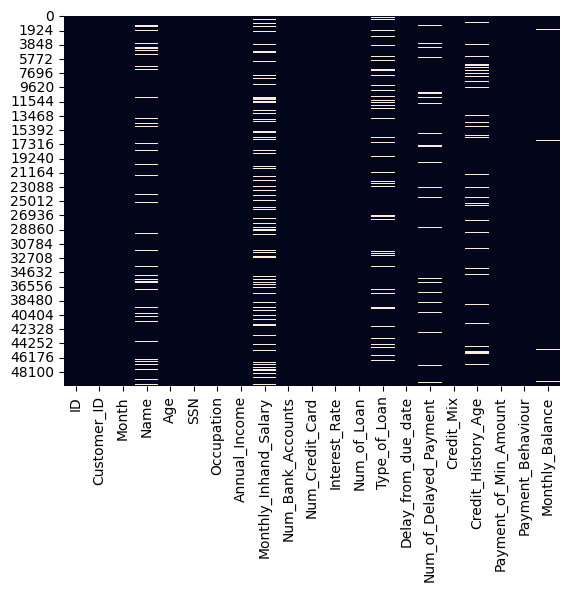

In [31]:
#Visualizing missing data
sns.heatmap(df.isnull(), cbar=False)
# Checking missing values for all attributes
for i in df.columns:
  missing_values = df[i].isna()
  print(f'{i} has {missing_values.sum()} missing values')

---

#### Handling missing data

In [11]:
#We can consider removing monthly inhand salary as we already have annual income. Also monthly inhand salary has a lot of missing values.
df = df.drop('Monthly_Inhand_Salary',axis=1)

---

#### Chi Square Test

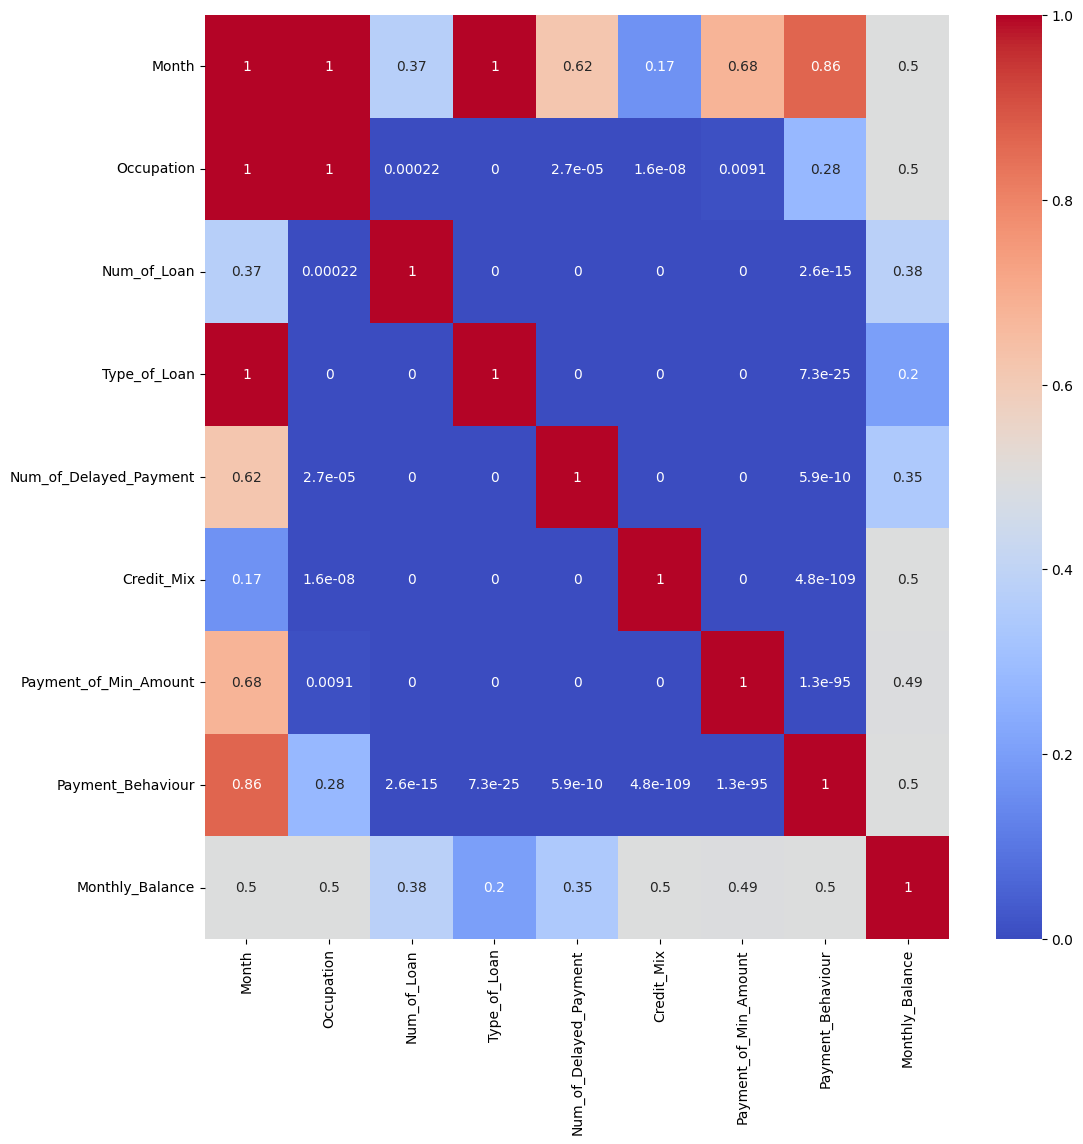

In [21]:
# Get a list of all categorical columns in df
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Initialize a DataFrame to store the p-values
p_values = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

# Loop over each pair of categorical columns and perform Chi-Square test
for i in range(len(categorical_cols)):
    for j in range(i+1, len(categorical_cols)):
        contingency_table = pd.crosstab(df[categorical_cols[i]], df[categorical_cols[j]])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        # Store the p-value in the DataFrame
        p_values.loc[categorical_cols[i], categorical_cols[j]] = p

# Since the matrix is symmetric, copy the upper triangle values to the lower triangle
p_values = p_values.combine_first(p_values.T)

# Replace NaN values with 1 (since p-value for a variable with itself is 1)
p_values.fillna(1, inplace=True)
plt.figure(figsize=(12, 12))
# Plot the heatmap using seaborn
sns.heatmap(p_values.astype(float), cmap='coolwarm', annot=True)
plt.show()

In [18]:
#Here goes the correlation matrix

#### Considering our chi square test, we can determine what values we can remove given their p values. We check whether

In [13]:
#Function that determines whether a client receives a credit or not.
#Example of function that determines credit worthiness
#def determine_creditworthiness(client):
    # Define your conditions for credit approval
#    if (client['Annual_Income'] > 50000) and (client['Credit_History_Age'] > '5 Years') and (client['Num_of_Delayed_Payment'] < 3):
#        return 'Approved'
#    else:
#        return 'Not Approved'